In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%2.2f' % float(height),
                ha='center', va='bottom')

Simple Plots in Python

In this tutorial we'll show you some basic templates of scientific plots using Python matplotlib.

# Bar graphs with standard error bars for 1 group

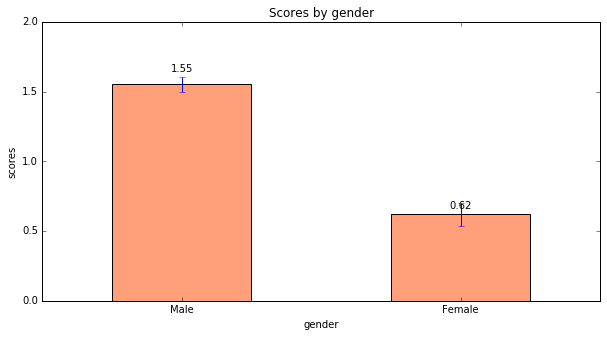

In [27]:
# based on http://matplotlib.org/examples/api/barchart_demo.html

# Make some fake data
d = {'gender': np.hstack([np.ones(10), np.zeros(10)]), 'scores': np.hstack([np.random.rand(10), np.random.rand(10)+1])}
df = pd.DataFrame(d)

# Change this part and replace with the variables you want to plot and the grouping variable column name.
vals = ['scores'] # This is the column name of the variable to plot on Y axis
group = ['gender'] # This is the grouping variable for the X axis

# Get means for each group
means = df[vals+group].groupby(group).mean().squeeze()
# Get standard error of means for each group
sems = df[vals+group].groupby(group).sem().squeeze()

fig,ax = plt.subplots(figsize=(10,5)) # Change figure size in (width,height)
ind = np.arange(np.size(np.unique(df[group]),0)) # location of bars
width = .5 # Width of bars
# (bar x-location, bar heights, width=bar width, color=bar color, yerr=standard error,ecolor=errorbarcolor)
rects1 = ax.bar(ind - width/2,means,width=.5,color='lightsalmon',yerr=sems,ecolor='blue') 
# Look up different colors here: http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

# configure axes properties to make pretty
ax.set_ylabel('scores')
ax.set_xlabel('gender')
ax.set_title('Scores by gender')
ax.set_xticks(ind)
ax.set_xticklabels(['Male','Female'])
ax.set_xlim([-.5,1.5]) 
ax.set_ylim([0,2])

# This part calls the function autolabel() defined above, and labels the bars with values
autolabel(rects1)

plt.show()

# Bar graphs with standard error bars for 2 group

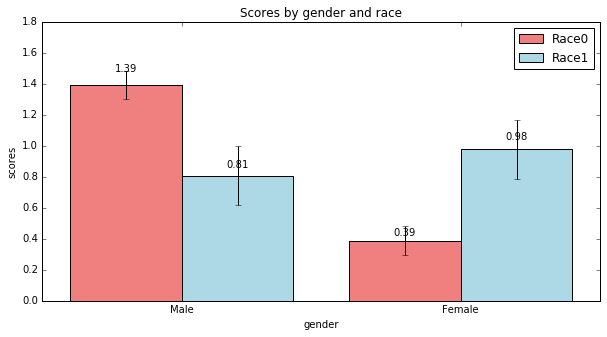

In [24]:
# Make some fake data
d = {'race': np.random.permutation(np.hstack([np.ones(10), np.zeros(10)])), 
     'gender': np.hstack([np.ones(10), np.zeros(10)]), 
     'scores': np.hstack([np.random.rand(10), np.random.rand(10)+1])}
df = pd.DataFrame(d)

# Change this part and replace with the variables you want to plot and the grouping variable column name.
val =['scores']
group1 = ['gender']
group2 = ['race']

# Get means and sems for Gender group
means1 = df[val+group1].groupby(group1).mean().squeeze()
sems1 = df[val+group1].groupby(group1).sem().squeeze()
# Get means and sems for Race group
means2 = df[val+group2].groupby(group2).mean().squeeze()
sems2 = df[val+group2].groupby(group2).sem().squeeze()

fig,ax = plt.subplots(figsize=(10,5)) # Change figure size in (width,height)
ind = np.array([0.,1.]) # location of bars
width = .4 # Width of bars

# plot score by gender
rects1 = ax.bar(ind - width,means1,width,color='lightcoral',yerr=sems1,ecolor='k') # (bar x-location, bar heights, width=bar width, color=bar color, yerr=standard error)
# plot score by race 
rects2 = ax.bar(ind,means2,width,color='lightblue',yerr=sems2,ecolor='k')

# configure axes properties to make pretty
ax.set_ylabel('scores')
ax.set_xlabel('gender')
ax.set_title('Scores by gender and race')
ax.set_xticks(ind)
ax.set_xticklabels(['Male','Female'])
ax.set_xlim([ind[0]-width*1.25,ind[-1]+width*1.25]) 
ax.set_ylim([0,1.8])

ax.legend(['Race0','Race1'])

autolabel(rects1)
autolabel(rects2)


# Scatterplots of 1 group with jittered location

If you try to plot something like a scaled data, you won't be able to see how clustered they are because they would just plot on top of each other. One way to avoid this is to jitter the x,y locations around the actual value.

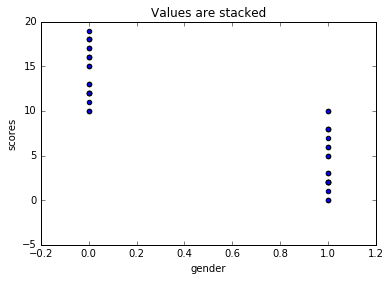

In [12]:
# Make some fake data
d = {'race': np.random.permutation(np.hstack([np.ones(20), np.zeros(20)])),
     'gender': np.hstack([np.ones(20), np.zeros(20)]), 
     'scores': np.round(10*np.hstack([np.random.rand(20), np.random.rand(20)+1]))}
df = pd.DataFrame(d)
ax = df.plot(kind='scatter',x='gender',y='scores')
ax.set_title('Values are stacked')
plt.show()

Here is the fix. 

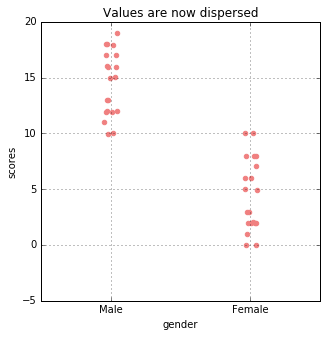

In [15]:
# Set x,y values for each group
gender0 = 0 # value of first group
y0 = df[['scores']].loc[df['gender']==gender0].values.squeeze() # Grabs y values for Gender =0
y0 = y0+(np.random.rand(len(y0))-.5)*.1 #Change after + sign to control dispersion
x0 = np.ones(len(y0))*gender0 +(np.random.rand(len(y0))-.5)*.1 #Change after + sign to control dispersion

gender1 = 1 # value of second group
y1 = df[['scores']].loc[df['gender']==gender1].values.squeeze()
y1 = y1+(np.random.rand(len(y1))-.5)*.1
x1 = np.ones(len(y1))*gender1 + (np.random.rand(len(y1))-.5)*.1

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(x0,y0,color='lightcoral')
ax.scatter(x1,y1,color='lightcoral')
ax.set_ylabel('scores')
ax.set_xlabel('gender')
ax.set_title('Values are now dispersed')
ax.set_xticks([0,1])
ax.set_xticklabels(['Male','Female'])
ax.set_xlim([-.5,1.5]) 
ax.grid() # puts grid on
plt.show()

# Drawing trend line on a scatterplot

In [20]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

d = {'race': np.random.permutation(np.hstack([np.ones(20), np.zeros(20)])),
     'gender': np.hstack([np.ones(20), np.zeros(20)]), 
     'scores': np.round(10*np.hstack([np.random.rand(20), np.random.rand(20)+1]))}
df = pd.DataFrame(d)
lm = smf.ols(formula = "scores ~ gender",data=df).fit()
print lm.summary()

# Save the slope for gender to b1 and intercept to b0
b1 = lm.params[1] # This is slope
b0 = lm.params[0] # This is intercept

                            OLS Regression Results                            
Dep. Variable:                 scores   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.6
Date:                Wed, 25 May 2016   Prob (F-statistic):           1.07e-12
Time:                        20:54:30   Log-Likelihood:                -100.33
No. Observations:                  40   AIC:                             204.7
Df Residuals:                      38   BIC:                             208.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     15.6500      0.682     22.952      0.0

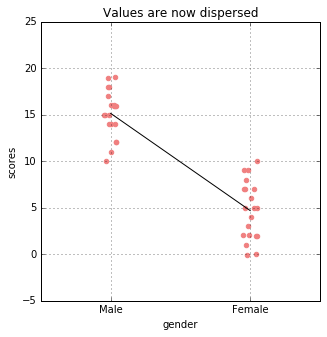

In [19]:
# Set x,y values for each group
gender0 = 0 # value of first group
y0 = df[['scores']].loc[df['gender']==gender0].values.squeeze()
y0 = y0+(np.random.rand(len(y0))-.5)*.1 #Change after + sign to control dispersion
x0 = np.ones(len(y0))*gender0 + (np.random.rand(len(y0))-.5)*.1 #Change after + sign to control dispersion

gender1 = 1 # value of second group
y1 = df[['scores']].loc[df['gender']==gender1].values.squeeze()
y1 = y1+(np.random.rand(len(y1))-.5)*.1
x1 = np.ones(len(y1))*gender1 + (np.random.rand(len(y1))-.5)*.1

fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(x0,y0,color='lightcoral')
ax.scatter(x1,y1,color='lightcoral')

# Part that adds the line
spacing = 10
minx = df[['gender']].min().squeeze()
maxx = df[['gender']].max().squeeze()
lx = np.linspace(minx,maxx,spacing) # make x coordinates 
ly = b0+lx*b1 # Estimate the y values using betas
ax.plot(lx,ly,'-k')

ax.set_ylabel('scores')
ax.set_xlabel('gender')
ax.set_title('Values are now dispersed')
ax.set_xticks([0,1])
ax.set_xticklabels(['Male','Female'])
ax.set_xlim([-.5,1.5]) 
ax.grid()
plt.show()